In [177]:
#libraries to import
import pandas as pd  #data analysis and manipulation
import numpy as np   # for numerical processing 
import matplotlib as plt # for visualisation
import seaborn as sns # for better visualization. It s based on matplotlib
# for inline graph
%matplotlib inline 

In [178]:
df_iris=sns.load_dataset('iris')

In [179]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
#Exploratory Data analysis
df_iris.shape #to find no of row and columns in dataset
df_iris.info() #to see the type of columns
df_iris.describe() #data distribution of each numeric columns(statistics)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [13]:
df_iris.describe() #data distribution of each numeric columns(statistics)

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [68]:
# adding one record for null just to practice with null.
df_iris.head()
df_iris.index.max() #149
df_iris.loc[150]=[np.nan,np.nan,np.nan,np.nan,'Versicolor']
df_iris.loc[151]=[np.nan,np.nan,12.5,10.5,np.nan]
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 0 to 151
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  151 non-null    float64
 3   petal_width   151 non-null    float64
 4   species       151 non-null    object 
dtypes: float64(4), object(1)
memory usage: 12.1+ KB


In [82]:
df_iris.tail()
df_iris['species']=df_iris['species'].str.lower()  # can ignore nulls while converting which generally lambda doesnot do
#df_iris['species']=df_iris['species'].map(lambda x:x.lower()) # have to do fill na before you can use lambda
df_iris.loc[150,'petal_length']=20.5
df_iris.tail()


,sepal_length,sepal_width,petal_length,petal_width,species
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica
150,NaN,NaN,20.5,NaN,versicolor
151,NaN,NaN,12.5,10.5,NaN


In [83]:
# analysing of output/ label column that we wish to predict
df_iris['species'].value_counts() # all distinct species label and counts (dataset is balanced or imbalanced)
#df_iris['species'].unique() #return unique values in an array only for series
#df_iris['species'].nunique() #returns no of unique values

versicolor    51
setosa        50
virginica     50
Name: species, dtype: int64

In [84]:
df_iris.groupby('species').count()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,50,50,50,50
versicolor,50,50,51,50
virginica,50,50,50,50


In [108]:
df_iris.groupby('species')['species'].count()

species
setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

# analysing null

In [120]:
df_iris.isna().any() # if we have nulls
df_iris.isna().sum() #returns no of nulls

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

,sepal_length,sepal_width,petal_length,petal_width,species
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
145,NaN,NaN,NaN,NaN,NaN
146,NaN,NaN,NaN,NaN,NaN
147,NaN,NaN,NaN,NaN,NaN
148,NaN,NaN,NaN,NaN,NaN


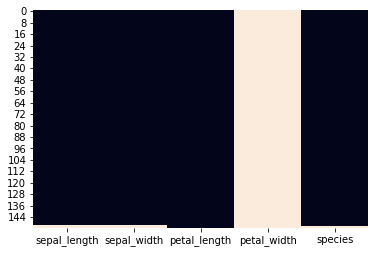

In [102]:
# how to visualize null
sns.heatmap(df_iris.isna(),cbar=False)
#df_iris.isna()

# analysing duplicates

In [136]:
df_iris.duplicated().any() # if duplicate row exist
df_iris.duplicated().sum() # no of duplicate rows

1

In [163]:
df_iris[df_iris.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
142,5.8,2.7,5.1,1.9,virginica


In [164]:
df_iris[df_iris.duplicated(keep=False)] # to see the duplicate records both in this case

,sepal_length,sepal_width,petal_length,petal_width,species
101,5.8,2.7,5.1,1.9,virginica
142,5.8,2.7,5.1,1.9,virginica


In [180]:
df_iris.drop(index=142,inplace=True)
df_iris.tail(10)

,sepal_length,sepal_width,petal_length,petal_width,species
139,6.9,3.1,5.4,2.1,virginica
140,6.7,3.1,5.6,2.4,virginica
141,6.9,3.1,5.1,2.3,virginica
143,6.8,3.2,5.9,2.3,virginica
144,6.7,3.3,5.7,2.5,virginica
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


#Convert output column to label integers

In [181]:
#using map and lambda
df_iris1=df_iris.copy()
df_iris1['species']=df_iris1['species'].map(lambda x:1 if x=='setosa' else (2 if x=='verginica' else 3))
df_iris1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [176]:
df_iris1['species']=df_iris1['species'].map(lambda x:1 if x=='setosa' else (2))
df_iris1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2


In [192]:
#using Label encoder from scikit learn
from sklearn import preprocessing as p
lb_encoder=p.LabelEncoder()
lb_encoder.fit(df_iris['species'])
df_iris['species']=lb_encoder.transform(df_iris['species'])
df_iris.head()
#lb_encoder.classes_

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#finding corelations for feature selection

In [193]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [160]:
df_iris1.groupby('species').agg(['min','max'])

sepal_length      sepal_width      petal_length      petal_width     
                 min  max         min  max          min  max         min  max
species                                                                      
1                4.9  7.9         2.2  3.8          4.5  6.9         1.4  2.5
2                4.9  7.0         2.0  3.4          3.0  5.1         1.0  1.8
3                4.3  5.8         2.3  4.4          1.0  1.9         0.1  0.6

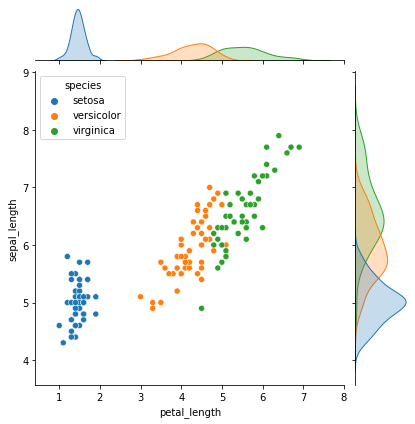

In [170]:
sns.jointplot(x='petal_length',y='sepal_length',data=df_iris,hue='species')

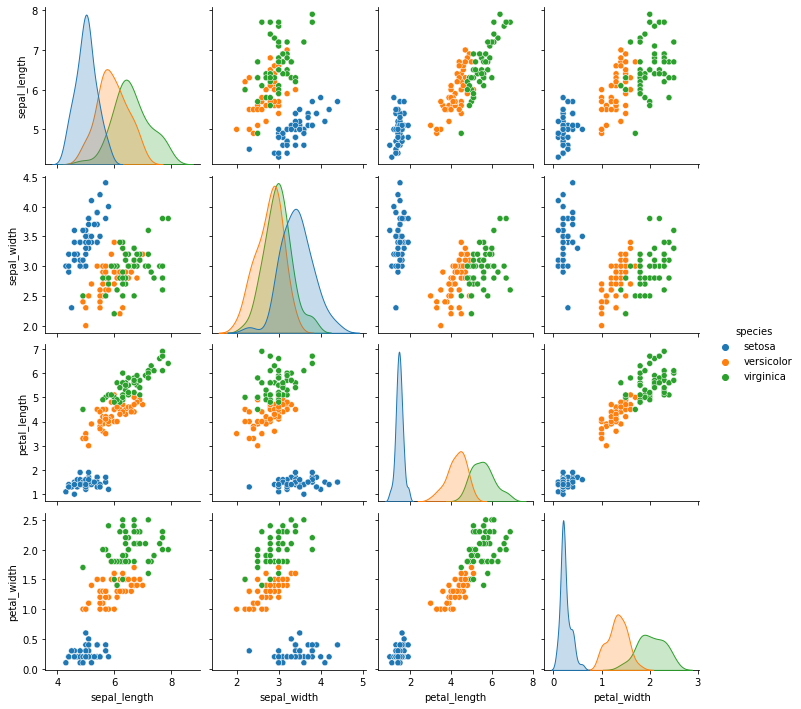

In [166]:
sns.pairplot(df_iris,hue='species')

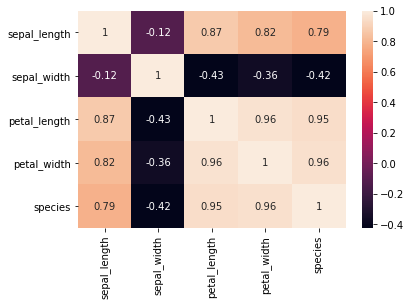

In [194]:
sns.heatmap(df_iris.corr(),annot=True)

# Avoiding feature scaling

# Training the model

In [198]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [208]:
df_iris.columns
X=df_iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
#X1=df_iris.drop(columns=['species'])
y=df_iris['species']

In [209]:
from sklearn.model_selection import train_test_split

In [210]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [212]:
print(type(X_train),type(X_test),type(y_train),type(y_test))
print(len(X_train),len(X_test),len(y_train),len(y_test))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>
104 45 104 45


#Implementing LR algorithm

In [221]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression(max_iter=200)
lr_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [231]:
predictions=lr_model.predict(X_test)
lr_model.score(X_test,y_test)    #0.9777777777777777
#lr_model.score(X_train,y_train) #0.9519230769230769

0.9777777777777777

## Metrics

In [234]:
from sklearn import metrics
metrics.confusion_matrix(y_test,predictions)

array([[16,  0,  0],
       [ 0, 11,  0],
       [ 0,  1, 17]])

In [236]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.92      1.00      0.96        11
           2       1.00      0.94      0.97        18

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [238]:
metrics.accuracy_score(y_test,predictions) # same as your model.score()

0.9777777777777777

# implementing Decision Tree

In [239]:
from sklearn.tree import DecisionTreeClassifier

In [260]:
dt_model=DecisionTreeClassifier(max_depth=2)

In [261]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [262]:
dt_predictions=dt_model.predict(X_test)

In [264]:
#dt_model.score(X_test,y_test)   #0.93

dt_model.score(X_train,y_train)   #1.0 on setting max_depth=2 train score reduced from 1 to 0.9711538461538461

0.9711538461538461

In [265]:
# to check the model parameters
dt_model.tree_.max_depth

2